In [16]:
import sys
sys.path.append('/home/batman/PycharmProjects/tensorflow-wavenet/')
import preprocess
import imp
import h5py
imp.reload(preprocess)
import numpy as np

from IPython.display import Audio
import matplotlib.pyplot as plt



#
#freq = preprocess.load_pca('../data/musicnet_pca_reduced.h5', coeff_file='../data/Beethoven_only_2322_generated.h5')
#audio = preprocess.load_freq(freq

In [22]:
sample_freq = 44100
pca = preprocess.Audio_PCA()
normalized = True
audio_length = 120 * sample_freq

#h5f = h5py.File('../musicnet/musicnet_extracted.h5','r') #stride 512, alle musicnet samples
#h5f = h5py.File('../musicnet/musicnet2_extracted.h5','r') #stride 2048, nur piano samples
#h5f = h5py.File('../musicnet/musicnet_normalized_extracted.h5','r') #stride 2048, nur piano samples
h5f = h5py.File('../musicnet/musicnet2_normalized_extracted.h5','r') #stride 512, nur piano samples

pca.components_ = h5f["pca/components_"].value
pca.mean_ = h5f["pca/mean_"].value

if normalized:
    mean = h5f["normalize/mean"].value
    var = h5f["normalize/var"].value

#h5f_coeff = h5py.File('../musicnet/musicnet_pca_generated.h5', 'r')
#h5f_coeff = h5py.File('../musicnet/musicnet2_pca_generated.h5', 'r')
#h5f_coeff = h5py.File('../musicnet/musicnet_pca_normalized_generated.h5', 'r')
#h5f_coeff = h5py.File('../musicnet/musicnet2_pca_normalized_generated.h5', 'r')
h5f_coeff = h5py.File('../musicnet/musicnet2_pca_normalized_experiment_generated.h5','r')

coeff = h5f_coeff["generated"].value
h5f_coeff.close()

#print np.mean(coeff, axis=0)
#print np.var(coeff, axis=0)


#plt.plot(coeff_true[:2000].sum(axis=1), label='true')
#plt.plot(coeff[:2000].sum(axis=1), label='generated')
#loss = np.square(coeff_true[:1500]-coeff[:1500]).sum(axis=-1)
#plt.plot(loss)
#plt.legend()
#print(loss.mean())

if not normalized:
    coeff = coeff * var
    coeff = coeff + mean

freq_output = pca.inverse_transform(coeff)
audio = preprocess.load_freq({'generated': freq_output},abs_value=False)["generated"]
Audio(audio[:audio_length], rate=sample_freq)

frequencies of file generated converted into audio signal


In [82]:
#Save results as .h5 in a file 
output_file_location = '../musicnet/musicnet2_generated_audio.h5'
output_file = h5py.File(output_file_location, 'w')
output_file.create_dataset('generated', data=audio)
output_file.close()
print "generated audio saved in file "+ output_file_location

generated audio saved in file ../musicnet/musicnet2_generated_audio.h5


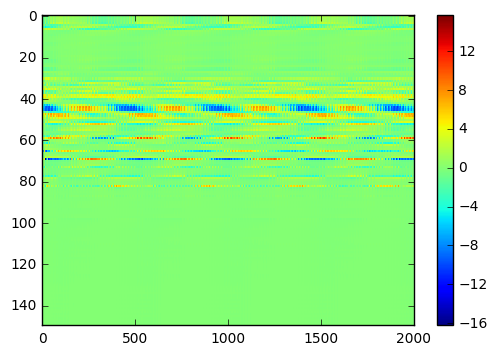

In [21]:
plt.imshow(np.real(freq_output[:int(120*sample_freq/2048)]).T, aspect='auto', interpolation='none')
plt.colorbar()
plt.show()
